In [17]:
import wfdb
from wfdb import processing
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

# Loading our Dataset

In [3]:
#All the patient IDs and their corresponding ECG labels and the ecg signals
patientID = []
y = []
records = []

with open('cinc2017/REFERENCE-v3.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        patientID.append(row[0])
        y.append(row[1])

for id in patientID:
    f = 'cinc2017/training2017/' + id
    record = wfdb.rdrecord(f).to_dataframe().to_numpy()
    resized_record = record.copy()
    resized_record.resize((9000, 1))
    records.append(resized_record)

X = np.array(records)
X = X.reshape(-1, 9000)
y = np.array(y)
y = y.reshape(-1, 1)

print("Data Loaded!")


Data Loaded!


In [4]:
print("X Input Shape", str(X.shape))
print("y Input Shape", str(y.shape))

X Input Shape (8528, 9000)
y Input Shape (8528, 1)


# Splitting Training, Cross Validation(Dev), and Testing sets

##### First split on 20% Test Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### Now let's split the training set using k-fold CV with shuffle
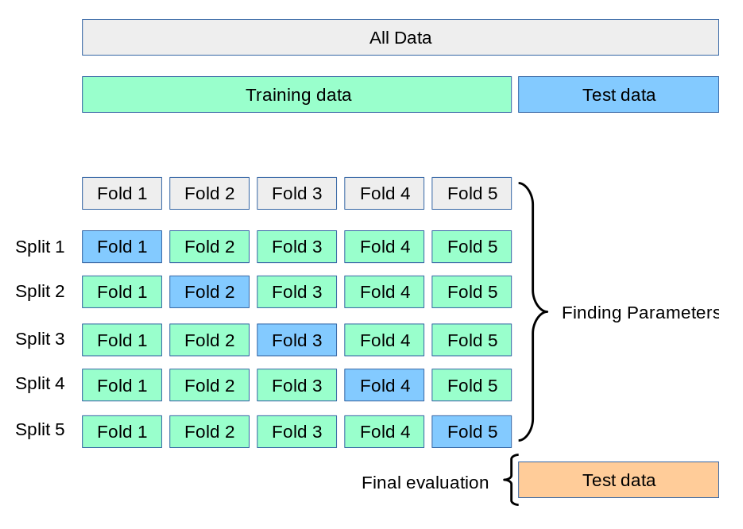

In [25]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
i = 1
train, test = rkf.split(X, y)


ValueError: too many values to unpack (expected 2)